Transformacion logaritmica a age.
a fnlwgt escala logaritmica si se mantiene

ploty

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy.stats import chi2_contingency

In [29]:
#import sys
#sys.path.append(r"..\src\utils.py")  # Añade la ruta al módulo

from utils import *  # Importa tu función


In [30]:
# Configurar Pandas
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 50)  # Ajusta según el tamaño de los datos
pd.set_option('display.float_format', '{:.2f}'.format)  # Cambiar a 2 decimales
pd.set_option('display.precision', 2)  # Cambiar a 2 decimales

In [31]:
df_raw = pd.read_csv('..\\data\\income_data.csv')
print(df_raw.shape)  # Devuelve (n_filas, n_columnas)

#Reemplazar 'capital-gain' y 'capital-loss' por una columna booleana
df_booleano = df_raw.copy()

df_booleano['has_capital_gain'] = (df_booleano['capital-gain'] > 0).astype(bool)
df_booleano['has_capital_loss'] = (df_booleano['capital-loss'] > 0).astype(bool)
#borrar las columnas 'capital-gain' y 'capital-loss'
df_booleano.drop(columns=['capital-gain', 'capital-loss'], inplace=True)

# Reemplazar '?' con NaN
df_raw2=df_booleano.replace('?', np.nan)
df_raw2.rename(columns={'gender': 'sex'}, inplace=True)
#Renombramos genero por sexo para que coincida con el diccionario de datos



(48842, 15)


In [32]:
df_raw2.head(10)  # Muestra las primeras 10 filas del DataFrame

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,has_capital_gain,has_capital_loss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,True,False
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,<=50K,False,False
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,False,False
6,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,40,United-States,<=50K,False,False
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K,True,False
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K,False,False
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K,False,False


In [33]:
df_raw2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               48842 non-null  int64 
 1   workclass         46043 non-null  object
 2   fnlwgt            48842 non-null  int64 
 3   education         48842 non-null  object
 4   educational-num   48842 non-null  int64 
 5   marital-status    48842 non-null  object
 6   occupation        46033 non-null  object
 7   relationship      48842 non-null  object
 8   race              48842 non-null  object
 9   sex               48842 non-null  object
 10  hours-per-week    48842 non-null  int64 
 11  native-country    47985 non-null  object
 12  income            48842 non-null  object
 13  has_capital_gain  48842 non-null  bool  
 14  has_capital_loss  48842 non-null  bool  
dtypes: bool(2), int64(4), object(9)
memory usage: 4.9+ MB


In [34]:
print(df_raw2.duplicated().sum()[df_raw2.duplicated().sum() > 0]) 
# LEn este caso no se recomienda eliminar los valores duplicados

[52]


In [35]:
print(df_raw2.isnull().sum()[df_raw2.isnull().sum() > 0]) 


workclass         2799
occupation        2809
native-country     857
dtype: int64


In [36]:
columnas_con_nulos = ['workclass', 'occupation', 'native-country']

C:\Users\isma_\AppData\Local\Temp\ipykernel_19772\3957874594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_raw2, x=col, palette='viridis', order=df_raw2[col].value_counts().index)


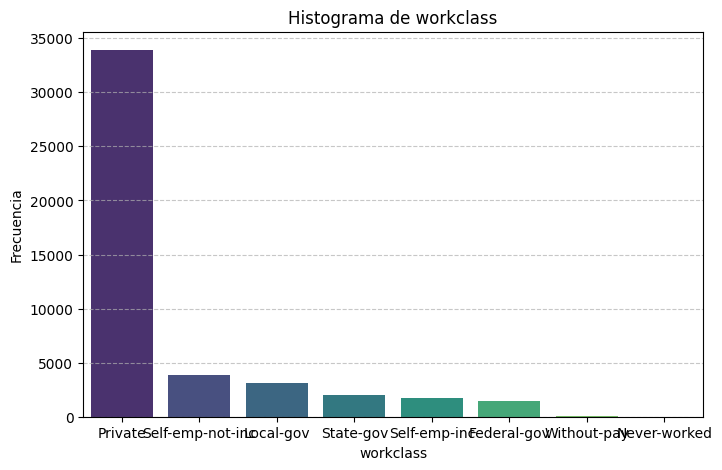

C:\Users\isma_\AppData\Local\Temp\ipykernel_19772\3957874594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_raw2, x=col, palette='viridis', order=df_raw2[col].value_counts().index)


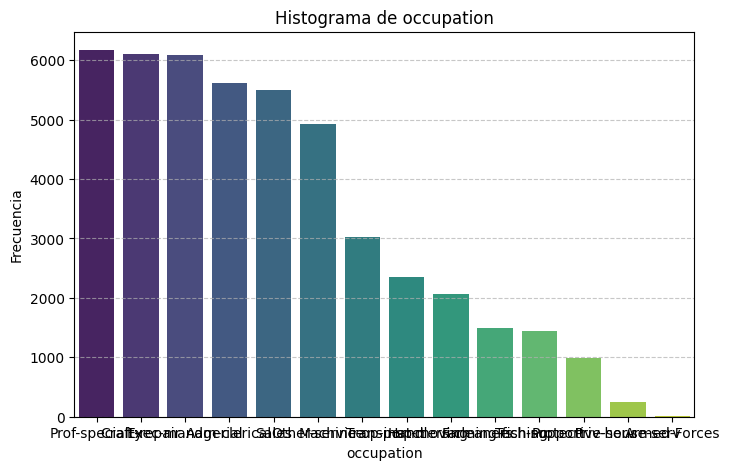

C:\Users\isma_\AppData\Local\Temp\ipykernel_19772\3957874594.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_raw2, x=col, palette='viridis', order=df_raw2[col].value_counts().index)


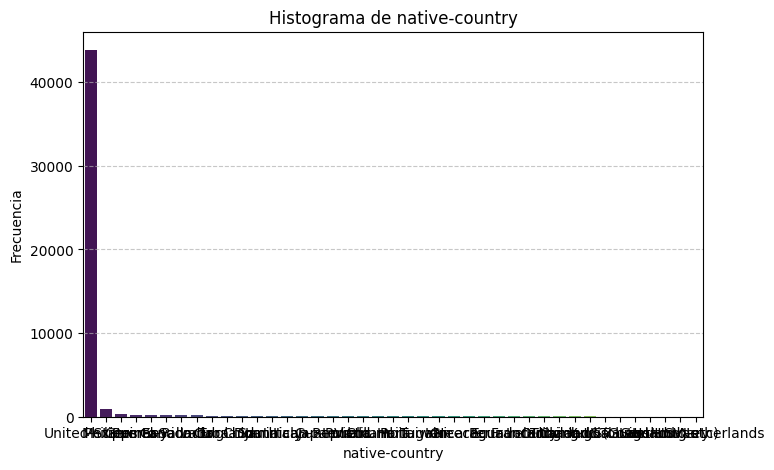

In [37]:
# Crear histogramas para las columnas seleccionadas
columns_to_plot = ['workclass', 'occupation', 'native-country']

for col in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df_raw2, x=col, palette='viridis', order=df_raw2[col].value_counts().index)
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [38]:
# Crear una copia del dataframe original
df_raw3 = df_raw2.copy()

# Rellenar los valores nulos con "Unknown" en las columnas específicas
df_raw3[columnas_con_nulos] = df_raw3[columnas_con_nulos].fillna('desconocido')

# Mostrar el conteo de valores nulos para verificar
print(df_raw3[columnas_con_nulos].isnull().sum())


workclass         0
occupation        0
native-country    0
dtype: int64


In [39]:
df_raw3.head(10)  # Muestra las primeras 10 filas del DataFrame 

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,has_capital_gain,has_capital_loss
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K,False,False
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K,False,False
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K,False,False
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K,True,False
4,18,desconocido,103497,Some-college,10,Never-married,desconocido,Own-child,White,Female,30,United-States,<=50K,False,False
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K,False,False
6,29,desconocido,227026,HS-grad,9,Never-married,desconocido,Unmarried,Black,Male,40,United-States,<=50K,False,False
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,32,United-States,>50K,True,False
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,40,United-States,<=50K,False,False
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,10,United-States,<=50K,False,False


In [40]:
df_raw3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               48842 non-null  int64 
 1   workclass         48842 non-null  object
 2   fnlwgt            48842 non-null  int64 
 3   education         48842 non-null  object
 4   educational-num   48842 non-null  int64 
 5   marital-status    48842 non-null  object
 6   occupation        48842 non-null  object
 7   relationship      48842 non-null  object
 8   race              48842 non-null  object
 9   sex               48842 non-null  object
 10  hours-per-week    48842 non-null  int64 
 11  native-country    48842 non-null  object
 12  income            48842 non-null  object
 13  has_capital_gain  48842 non-null  bool  
 14  has_capital_loss  48842 non-null  bool  
dtypes: bool(2), int64(4), object(9)
memory usage: 4.9+ MB


In [41]:
df_raw3.nunique(dropna=False).sort_values()  # Muestra valores únicos, incluyendo NaN, ordenados de menor a mayor

sex                     2
income                  2
has_capital_gain        2
has_capital_loss        2
race                    5
relationship            6
marital-status          7
workclass               9
occupation             15
education              16
educational-num        16
native-country         42
age                    74
hours-per-week         96
fnlwgt              28523
dtype: int64

# Analisis univariado

In [42]:
from utils import analisis_univariado_numerico,analisis_univariado_categorico

### Variables Categóricas

In [43]:
df_raw3["native-country"].unique()

array(['United-States', 'desconocido', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [44]:
df_raw_univariado_categorico = df_raw3.copy()

# Update the mapping to translate 'Europe' to 'Europa'
country_to_continent = {
    # America
    'United-States': 'America',
    'Cuba': 'America',
    'Jamaica': 'America',
    'Mexico': 'America',
    'South': 'America',  # Assuming South refers to South America or a specific country there
    'Puerto-Rico': 'America',
    'Honduras': 'America',
    'Canada': 'America',
    'Columbia': 'America',
    'Ecuador': 'America',
    'Haiti': 'America',
    'Dominican-Republic': 'America',
    'El-Salvador': 'America',
    'Guatemala': 'America',
    'Peru': 'America',
    'Outlying-US(Guam-USVI-etc)': 'America',
    'Trinadad&Tobago': 'America',
    'Nicaragua': 'America',

    # Asia
    'India': 'Asia',
    'Iran': 'Asia',
    'Philippines': 'Asia',
    'Cambodia': 'Asia',
    'Thailand': 'Asia',
    'Laos': 'Asia',
    'Taiwan': 'Asia',
    'China': 'Asia',
    'Japan': 'Asia',
    'Vietnam': 'Asia',
    'Hong': 'Asia',

    # Europa
    'England': 'Europa',
    'Germany': 'Europa',
    'Italy': 'Europa',
    'Poland': 'Europa',
    'Portugal': 'Europa',
    'France': 'Europa',
    'Yugoslavia': 'Europa',
    'Scotland': 'Europa',
    'Greece': 'Europa',
    'Ireland': 'Europa',
    'Hungary': 'Europa',
    'Holand-Netherlands': 'Europa',

    # Unknown
    'desconocido': 'desconocido',
}

# Apply the mapping to the 'native-country' column
df_raw_univariado_categorico["native-country"] = df_raw_univariado_categorico["native-country"].replace(country_to_continent)

# Verify the unique values after mapping
print(df_raw_univariado_categorico["native-country"].unique())

['America' 'desconocido' 'Europa' 'Asia']


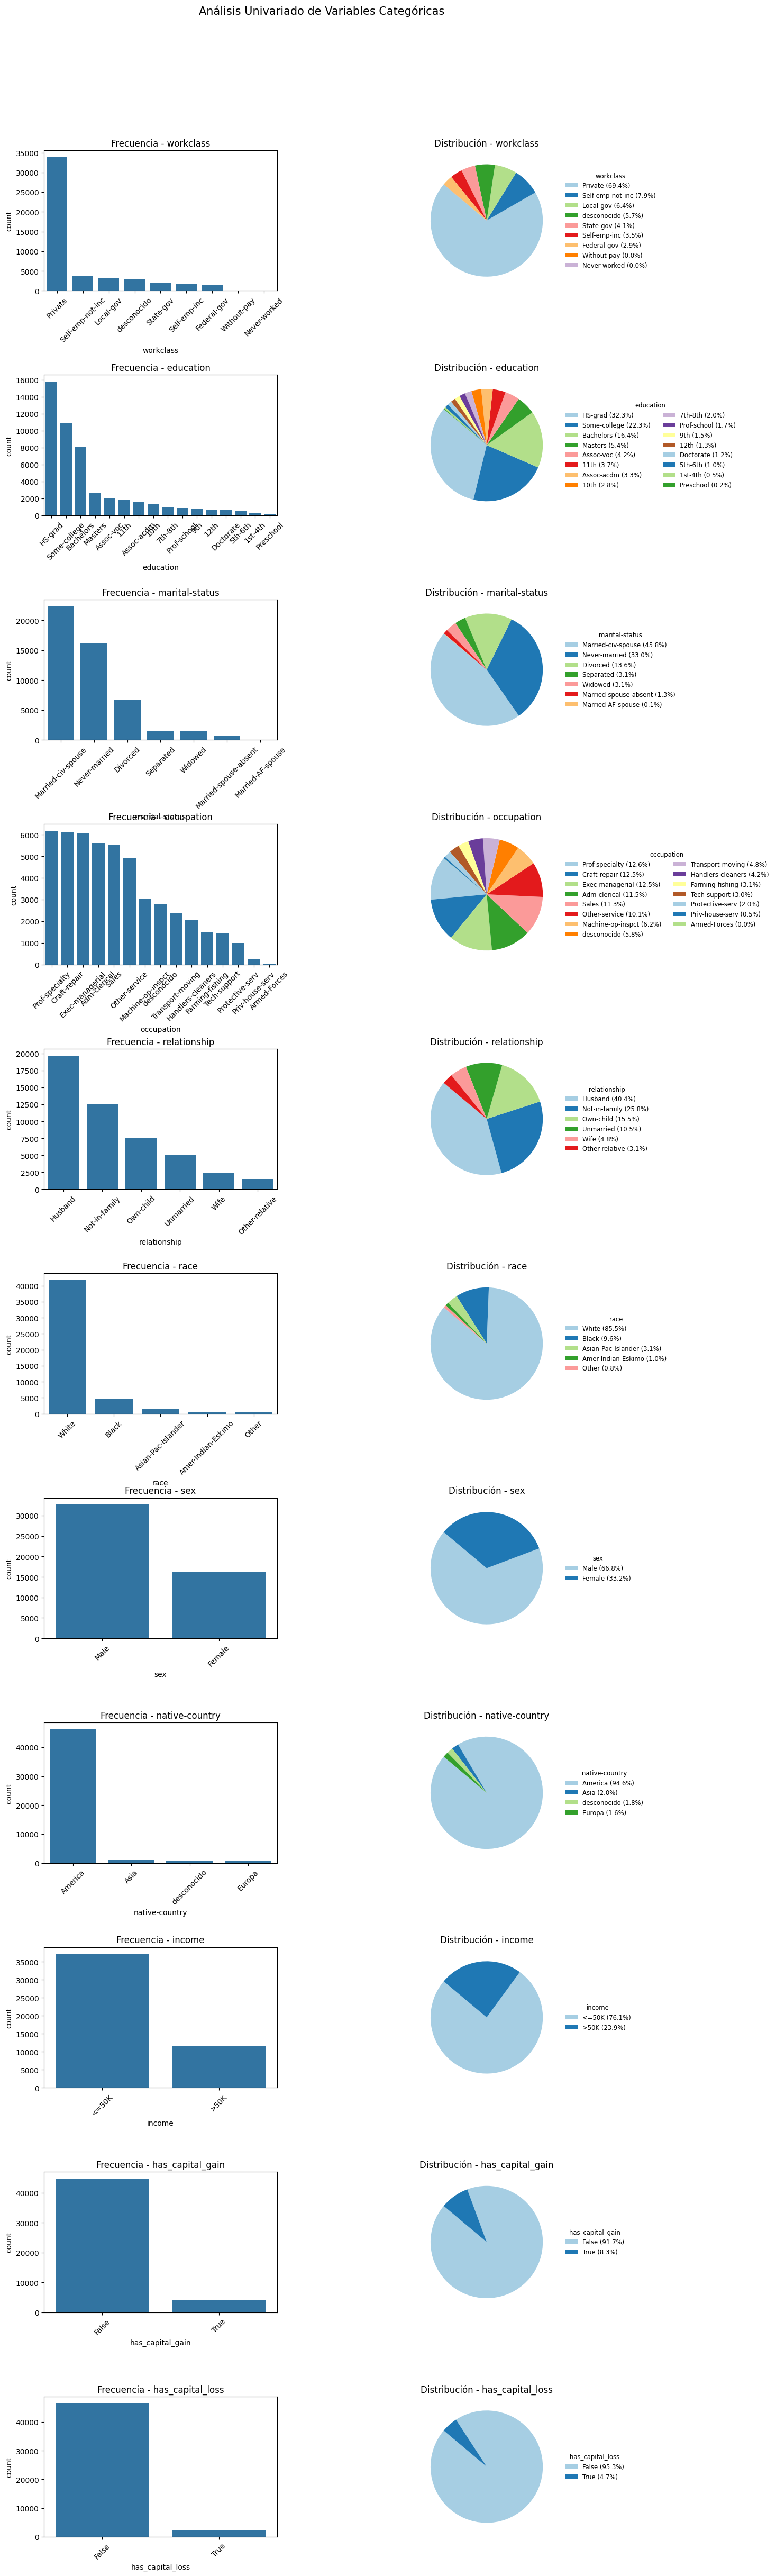

In [45]:
analisis_univariado_categorico(df_raw_univariado_categorico)

In [46]:
for col in df_raw3.select_dtypes(include=['object',bool]).columns.tolist():
    print(f"=== Columna: {col} ===")
    print(df_raw3[col].value_counts(dropna=False,normalize="index")*100)
    print("\n")

=== Columna: workclass ===
workclass
Private            69.42
Self-emp-not-inc    7.91
Local-gov           6.42
desconocido         5.73
State-gov           4.06
Self-emp-inc        3.47
Federal-gov         2.93
Without-pay         0.04
Never-worked        0.02
Name: proportion, dtype: float64


=== Columna: education ===
education
HS-grad        32.32
Some-college   22.27
Bachelors      16.43
Masters         5.44
Assoc-voc       4.22
11th            3.71
Assoc-acdm      3.28
10th            2.84
7th-8th         1.96
Prof-school     1.71
9th             1.55
12th            1.35
Doctorate       1.22
5th-6th         1.04
1st-4th         0.51
Preschool       0.17
Name: proportion, dtype: float64


=== Columna: marital-status ===
marital-status
Married-civ-spouse      45.82
Never-married           33.00
Divorced                13.58
Separated                3.13
Widowed                  3.11
Married-spouse-absent    1.29
Married-AF-spouse        0.08
Name: proportion, dtype: float64


===

### Numericas

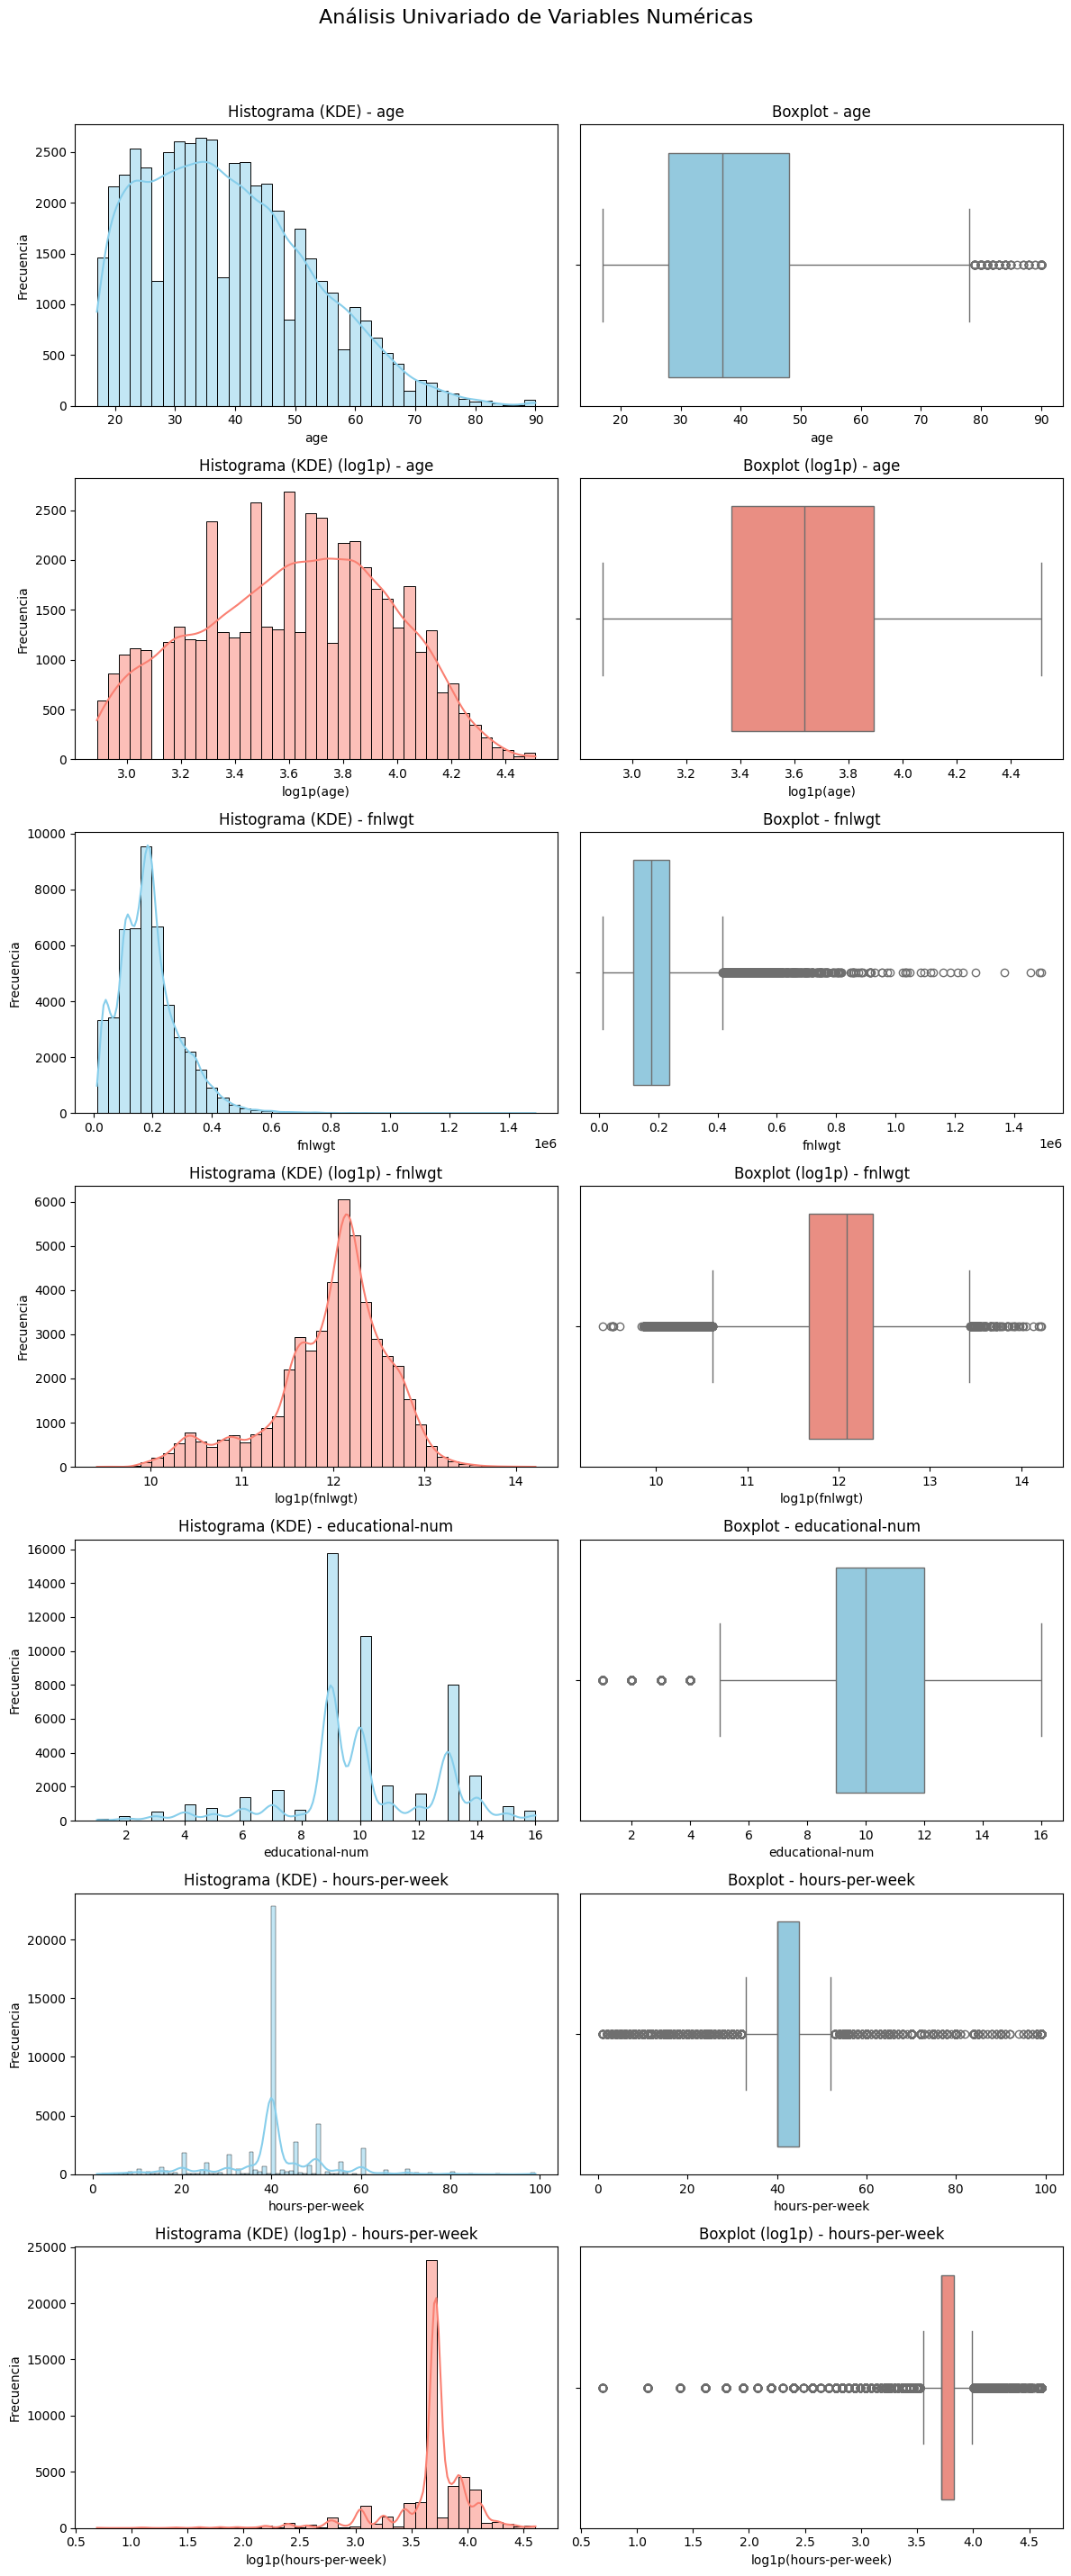

In [47]:
analisis_univariado_numerico(
    df_raw3,
    bins=40,
    apply_log_cols=["age","hours-per-week","fnlwgt"],
    orig_color="skyblue",
    log_color="salmon"
)


# Analisis bivariable

In [48]:
df_raw_bivariado_categorico=df_raw_univariado_categorico.copy()
#agrupación temática (`privado`, `público`, `autónomo` y `sin empleo`)
df_raw_bivariado_categorico['workclass'] = df_raw_bivariado_categorico['workclass'].replace({
    'Private': 'privado',
    'Self-emp-not-inc': 'autónomo',
    'Self-emp-inc': 'autónomo',
    'Federal-gov': 'público',
    'Local-gov': 'público',
    'State-gov': 'público',
    'Without-pay': 'sin empleo',
    'Never-worked': 'sin empleo'
})


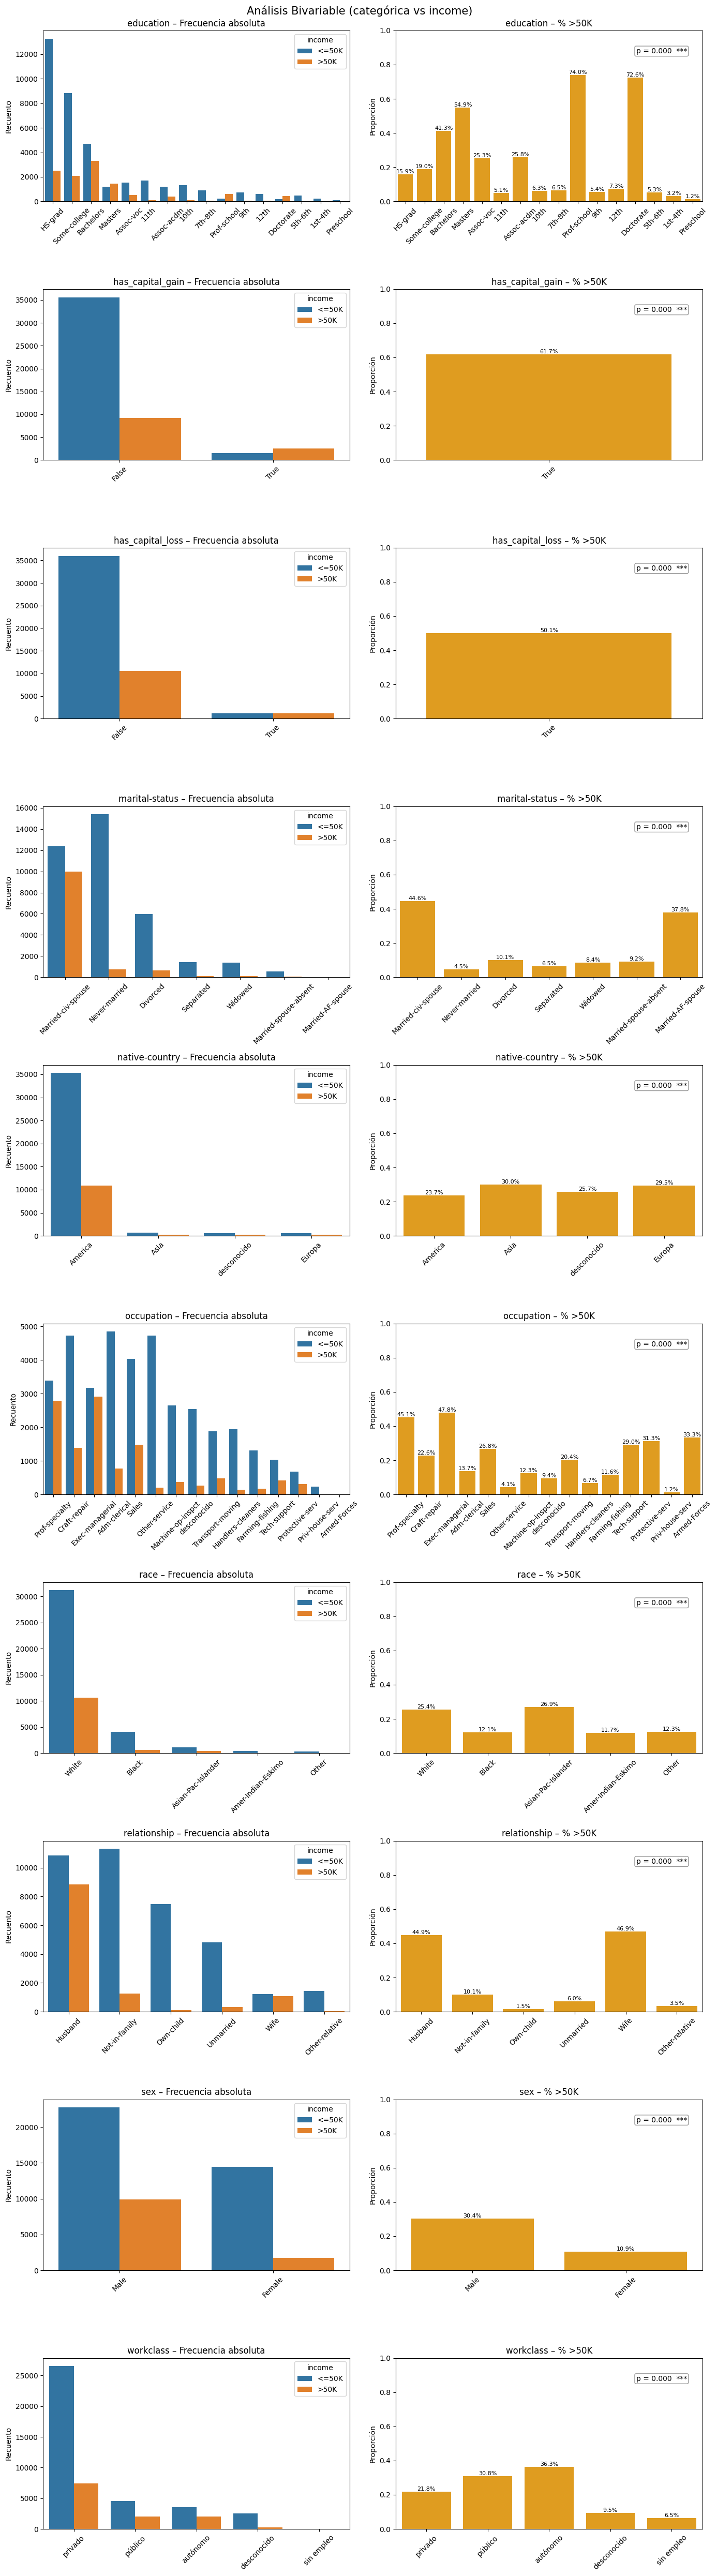

In [49]:
analisis_bivariado_categorico(
    df=df_raw_bivariado_categorico,          # tu DataFrame
    target="income",    # nombre de la variable objetivo
    positive_label=">50K",  # etiqueta de la clase positiva 
)


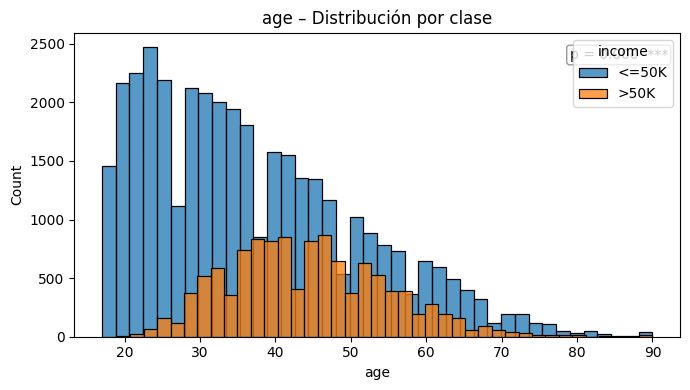

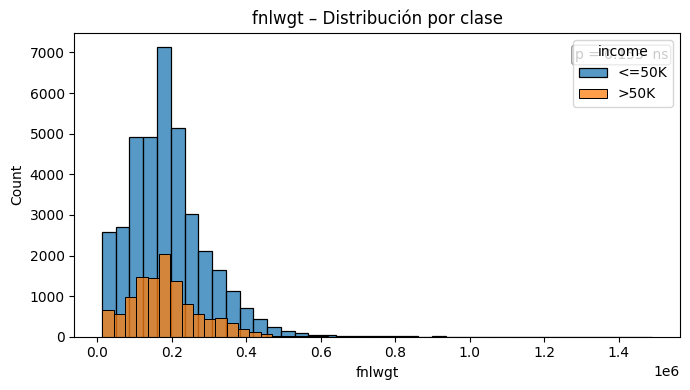

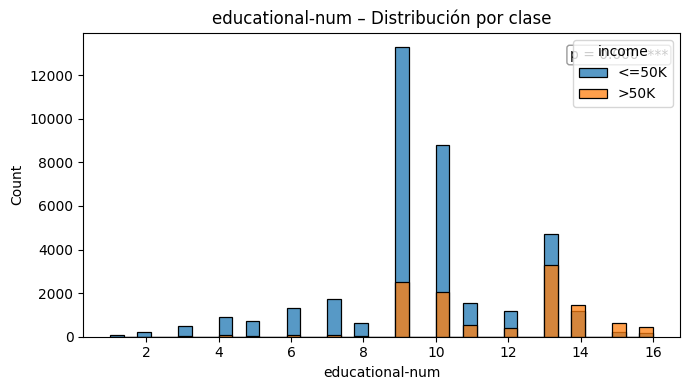

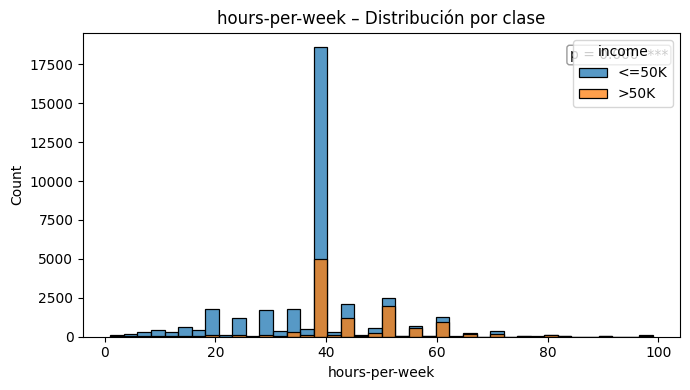

In [50]:
plot_num_t_test(
    df_raw3,
    target="income",
    positive_label=">50K",
    exclude_cols=[],           # Numéricas que quieras saltarte
    bins=40,
    colors=("#1f77b4", "#ff7f0e"),  # Ajusta aquí tu azul/naranja
    kde=False
)

# Analisis Multivariante

In [51]:
# Calcular correlaciones
pearson_corr = df_raw3.corr(method='pearson',numeric_only=True)
spearman_corr = df_raw3.corr(method='spearman',numeric_only=True)

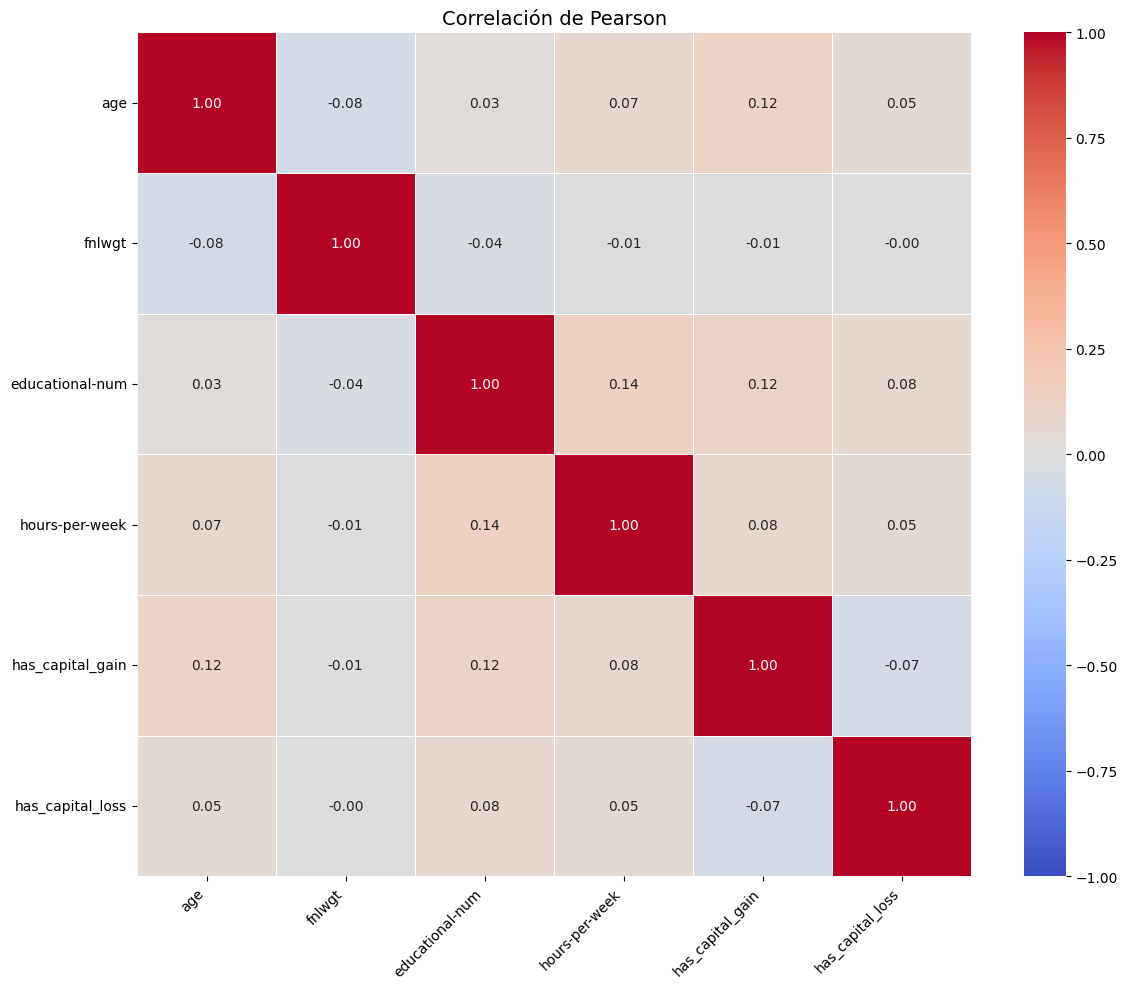

In [52]:
# -- 1) Pearson --
plt.figure(figsize=(12, 10))
sns.heatmap(pearson_corr, 
            annot=True,         # Cambia a False si hay muchas variables
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            linewidths=0.5,
            vmin=-1, vmax=1,  
            linecolor='white')
plt.title("Correlación de Pearson", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

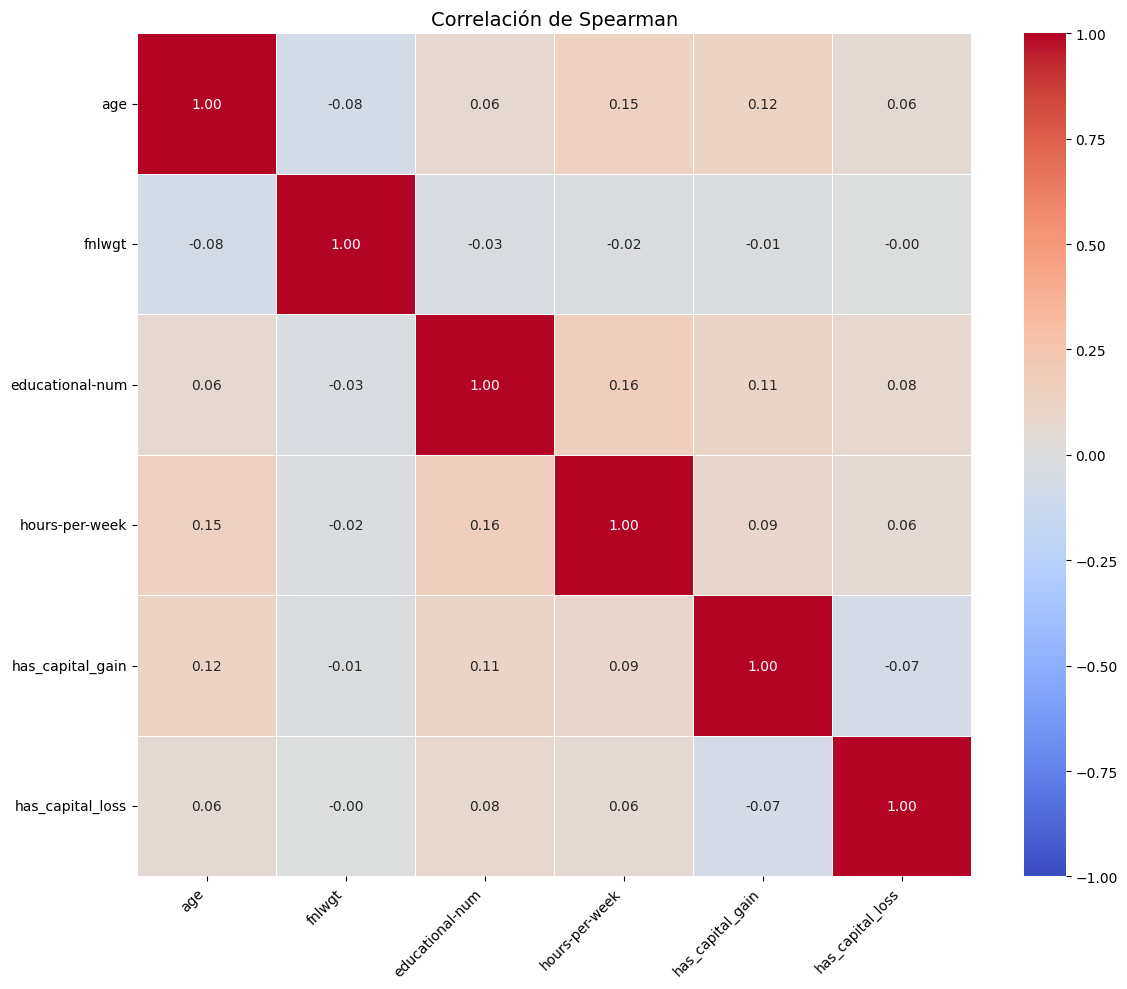

In [53]:
# -- 2) Spearman --
plt.figure(figsize=(12, 10))
sns.heatmap(spearman_corr, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            center=0,
            vmin=-1, vmax=1, 
            linewidths=0.5, 
            linecolor='white')
plt.title("Correlación de Spearman", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [54]:
display(analizar_asociaciones_categoricas(df_raw3, cat_limit=0, top_n=10, exclude_cols=[]))
# La variable target es 'Listening_Time_minutes'


Parejas de variables categóricas (excluyendo []) con Cramér’s V >= 0:


,Variable 1,Variable 2,Cramér’s V
35,relationship,sex,0.65
20,marital-status,relationship,0.49
22,marital-status,sex,0.46
37,relationship,income,0.45
24,marital-status,income,0.45
29,occupation,sex,0.42
41,race,native-country,0.40
2,workclass,occupation,0.40
16,education,income,0.37
31,occupation,income,0.35



--- Fin del análisis de asociaciones categóricas ---


None